# <b>CS156 (Introduction to AI), Spring 2022</b>
# <u><b>Homework 5 submission</b></u>

### Roster Name: Andrew Vu
### Student ID: 015055911
### Email address: andrew.k.vu@sjsu.edu
Any special notes or anything you would like to communicate to me about this homework submission goes in here.

##  <u>References and sources </u>

List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.
- decisiontreesbreast file
- https://datagy.io/reorder-pandas-columns/



##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [2]:
np.random.seed(42)

#### Code the solution

In [3]:
airline_file = pd.read_csv(r'C:\Users\Andrew\CS156 Jupyter Files\hw5input\homework5_input_data.csv')

### 1. Load Dataset

In [4]:
df = pd.DataFrame(airline_file, columns=airline_file.columns)
df.head()
columns = df.columns[:-1]
X = df[columns]
Y = df['satisfaction']
df['satisfaction'] = Y

class_names = ['neutral or dissatisfied', 'satisfied']

print(X.shape, Y.shape)

(103594, 22) (103594,)


In [5]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### 2. Convert categorical variables --> numeric format

In [6]:
unconverted = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

# print(df.dtypes)

int_df = df.select_dtypes(include=['int64', 'float64']).copy()
# print(int_df)

df_numeric = pd.get_dummies(df, columns=unconverted, prefix=unconverted)
df_numeric

# new_df = pd.concat([df_numeric, int_df])

# print(new_df)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,neutral or dissatisfied,0,1,1,0,0,1,0,0,1
1,25,235,3,2,3,3,1,3,1,1,...,neutral or dissatisfied,0,1,0,1,1,0,1,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,satisfied,1,0,1,0,1,0,1,0,0
3,25,562,2,5,5,5,2,2,2,2,...,neutral or dissatisfied,1,0,1,0,1,0,1,0,0
4,61,214,3,3,3,3,4,5,5,3,...,satisfied,0,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103589,23,192,2,1,2,3,2,2,2,2,...,neutral or dissatisfied,1,0,0,1,1,0,0,1,0
103590,49,2347,4,4,4,4,2,4,5,5,...,satisfied,0,1,1,0,1,0,1,0,0
103591,30,1995,1,1,1,3,4,1,5,4,...,neutral or dissatisfied,0,1,0,1,1,0,1,0,0
103592,22,1000,1,1,1,5,1,1,1,1,...,neutral or dissatisfied,1,0,0,1,1,0,0,1,0


In [7]:
# reordering the df so that satisfaction is at the end
satisfaction_col = df_numeric['satisfaction']
df_numeric = df_numeric.drop(columns=['satisfaction'])
df_numeric.insert(loc=27, column='satisfaction', value=satisfaction_col)

print(df_numeric)

new_columns = df_numeric.columns[:-1]
X_new = df_numeric[new_columns]
Y_new = df_numeric['satisfaction']

print(Y_new)
df_numeric['satisfaction'] = Y_new

        Age  Flight Distance  Inflight wifi service  \
0        13              460                      3   
1        25              235                      3   
2        26             1142                      2   
3        25              562                      2   
4        61              214                      3   
...     ...              ...                    ...   
103589   23              192                      2   
103590   49             2347                      4   
103591   30             1995                      1   
103592   22             1000                      1   
103593   27             1723                      1   

        Departure/Arrival time convenient  Ease of Online booking  \
0                                       4                       3   
1                                       2                       3   
2                                       2                       2   
3                                       5                      

### 3. Break data into training & test datasets

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y_new, test_size=0.2, random_state=0)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((82875, 27), (82875,), (20719, 27), (20719,))

### 4. Train Decision Tree Model and Report 5-fold cross-validation accuracy & mean accuracy

In [9]:
model = DecisionTreeClassifier(random_state=0)

cross_vals = cross_val_score(model, X_train, Y_train, cv=5)
print('Individual cross-validation accuracies: ' + str(cross_vals))
print('Mean cross validation accuracy: ' + str(cross_vals.mean()))

Individual cross-validation accuracies: [0.94365008 0.94129713 0.94449472 0.94533937 0.94292609]
Mean cross validation accuracy: 0.9435414781297133


### 5. Train Tree on Training Data and Report Prediction Accuracy on Test Data

In [10]:
model.fit(X_train, Y_train)

print('Accuracy of decision tree model on training set: {:.2f}'.format(model.score(X_train, Y_train)))

print('Accuracy of decision tree model on test set: {:.2f}'.format(model.score(X_test, Y_test)))

Accuracy of decision tree model on training set: 1.00
Accuracy of decision tree model on test set: 0.95


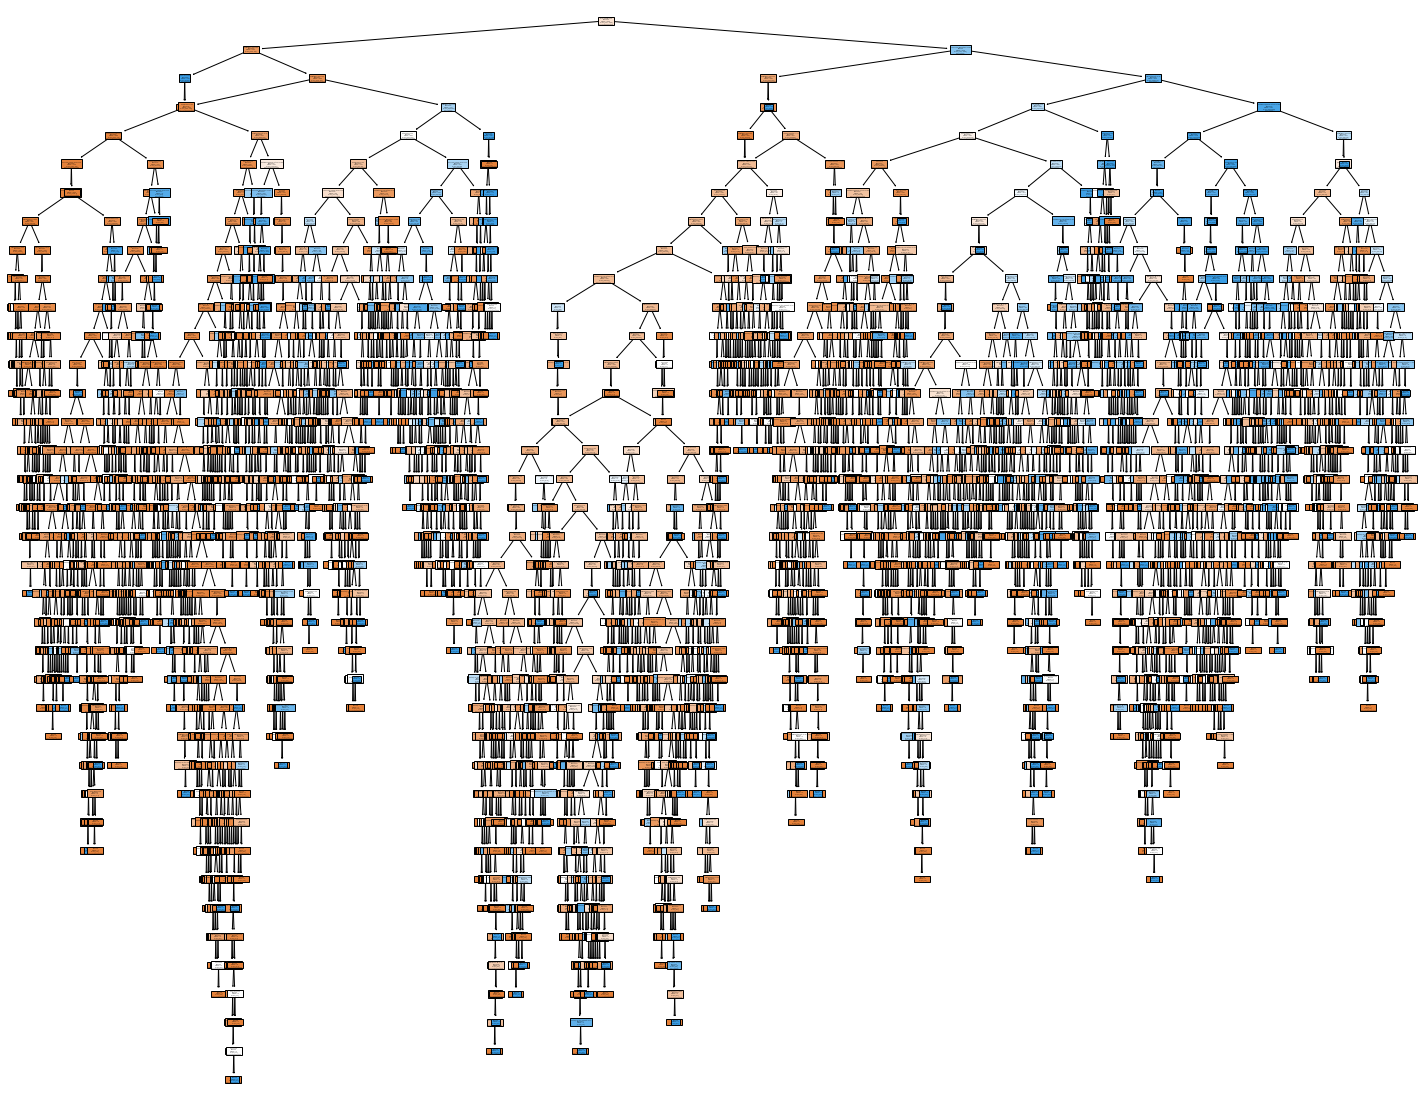

In [11]:
# Plotting tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, feature_names=new_columns, class_names=class_names, filled=True)

### 6. Plot confusion matrices

C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[11174   546]
 [  554  8445]]
Normalized confusion matrix
[[0.95 0.05]
 [0.06 0.94]]


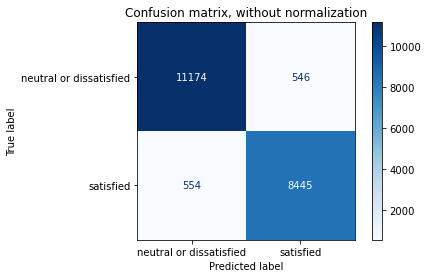

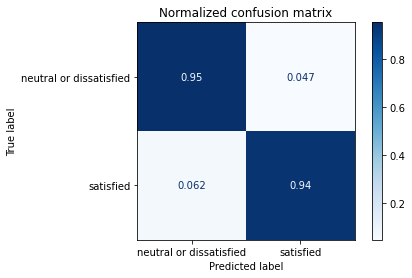

In [12]:
# this code is adopted from this example:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()